In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('WineQT.csv')

VOIR LES VARIABLES : ON SE CONCENTRE SUR ['volatile acidity'],df['alcohol'],df['sulphates'],df['citric acid']

[[0.7  9.4  0.56 0.  ]]
[5 5 5 ... 5 6 5]
1143
1143


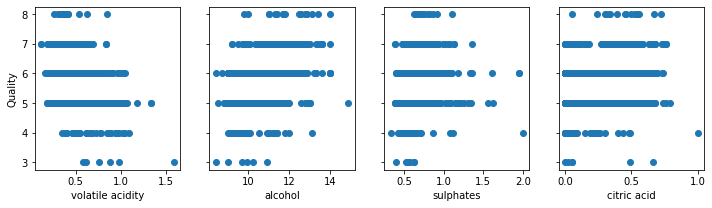

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# load the dataset

y_train = df['quality']
X_train= [df['volatile acidity'],df['alcohol'],df['sulphates'],df['citric acid']]
X_features = ['volatile acidity','alcohol','sulphates','citric acid']
X_train=np.transpose(np.asmatrix(X_train))
y_train=np.asarray(y_train)
print(X_train[:1])
print(y_train)
print(len(X_train))
print(len(y_train))
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter([X_train[:,i]],[y_train])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Quality")
plt.show()

In [18]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 

In [19]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")
print(X_norm)

X_mu = [[ 0.53133858 10.4421114   0.65770779  0.26836395]], 
X_sigma = [[0.1795546  1.0817221  0.17032416 0.19659979]]
Peak to Peak range by column in Raw        X:[[1.46 6.5  1.67 1.  ]]
Peak to Peak range by column in Normalized X:[[8.13123157 6.00893702 9.80483344 5.08647531]]
[[ 0.93933222 -0.96338181 -0.57365783 -1.36502663]
 [ 1.94181282 -0.59360107  0.1308811  -1.36502663]
 [ 1.27349242 -0.59360107 -0.04525363 -1.16156762]
 ...
 [ 0.38239855  0.05351522 -0.45623467 -0.9581086 ]
 [ 0.10393172  0.70063152  0.60057372 -0.8563791 ]
 [ 0.6330187  -0.22382033  0.30701583 -0.75464959]]


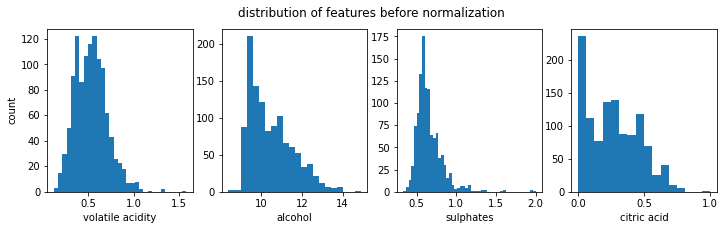

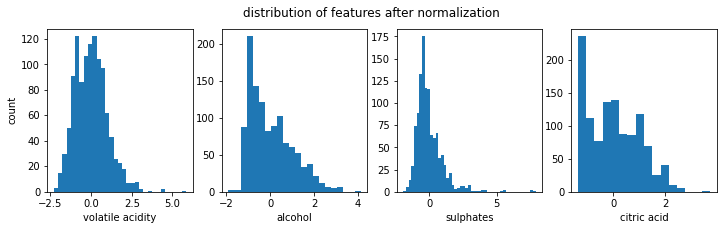

In [20]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(X_train[:,i],bins='auto')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count")
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))

for i in range(len(ax)):
    ax[i].hist(X_norm[:,i],bins='auto')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()

modif jeu de données

(591,)
(591, 4)


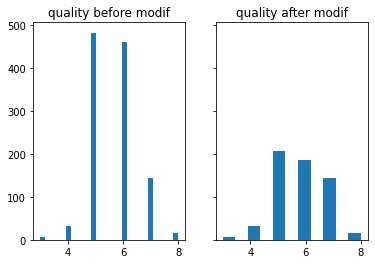

In [23]:
import random

fig,ax=plt.subplots(1,2,sharey=True)
ax[0].hist(df["quality"], bins='auto',label="quality")
ax[0].set_title("quality before modif")
supp=[]
#on supprime aleatoirement des valeurs de notes 5 et 6 (diviser par 3)
for i in range(len(y_train)):
    if y_train[i]==5 or y_train[i]==6:
        rand=random.random()
        if(rand>0.4):
            supp.append(i)
for j in range(len(supp)):
    y_train2=np.delete(y_train,supp)
    X_norm2=np.delete(X_norm,supp,0)


ax[1].hist(y_train2, bins='auto',label="quality")
ax[1].set_title("quality after modif")

print(y_train2.shape)
print(X_norm2.shape)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

2023-04-18 10:06:02.980521: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 10:06:03.322386: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 10:06:03.323576: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 10:06:06.083292: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [52]:
x=np.array(X_norm2)
y=np.array(y_train2).reshape(-1,1)
print(x.shape, y.shape)

(591, 4) (591, 1)


In [39]:
Xt = np.tile(x,(100,1))
Yt= np.tile(y,(100,1))   
print(Xt.shape, Yt.shape)  

(59100, 4) (59100, 1)


In [40]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(4,)),
        Dense(3, activation='linear', name = 'layer1'),
        Dense(1, activation='linear', name = 'layer2')
     ]
)

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 15        
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [42]:
L1_num_params = 4 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 4 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  15 , L2 params =  5


In [43]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(4, 3):
 [[-0.75942165  0.06992942 -0.2584147 ]
 [ 0.32170475  0.37864208  0.7300174 ]
 [ 0.26434755  0.55237985 -0.6140241 ]
 [ 0.5813948  -0.6612413   0.05400467]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[0.2393341 ]
 [0.82773626]
 [0.8694004 ]] 
b2(1,): [0.]


In [44]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
1847/1847 [==============================] - 7s 3ms/step - loss: 1.4043
Epoch 2/10
1847/1847 [==============================] - 6s 3ms/step - loss: 0.5825
Epoch 3/10
1847/1847 [==============================] - 6s 3ms/step - loss: 0.5813
Epoch 4/10
1847/1847 [==============================] - 6s 3ms/step - loss: 0.5829
Epoch 5/10
1847/1847 [==============================] - 6s 3ms/step - loss: 0.5793
Epoch 6/10
1847/1847 [==============================] - 6s 3ms/step - loss: 0.5792
Epoch 7/10
1847/1847 [==============================] - 6s 3ms/step - loss: 0.5793
Epoch 8/10
1847/1847 [==============================] - 6s 3ms/step - loss: 0.5766
Epoch 9/10
1847/1847 [==============================] - 6s 3ms/step - loss: 0.5768
Epoch 10/10
1847/1847 [==============================] - 6s 3ms/step - loss: 0.5768


In [47]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)


W1:
 [[-0.2460902  -0.05911353 -0.2339073 ]
 [-0.03444763  0.1519615   0.31972787]
 [ 0.04857557  0.49753433 -0.30585232]
 [ 0.32246503 -0.31770197  0.30635345]] 
b1: [1.6007822 1.8872201 1.9026985]
W2:
 [[0.31330094]
 [0.7307924 ]
 [0.7868353 ]] 
b2: [2.3022625]


TEST DU RESULTAT

In [50]:
X_test = np.array([
    [1,5,1,0],  # postive example
    ])   # negative example
norm_l = tf.keras.layers.Normalization(axis=-1)
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)
w_final=W2
b_final=b2

1/1 [==============================] - 0s 55ms/step
predictions = 
 [[7.2730417]]


19/19 [==============================] - 0s 5ms/step
(591, 1)


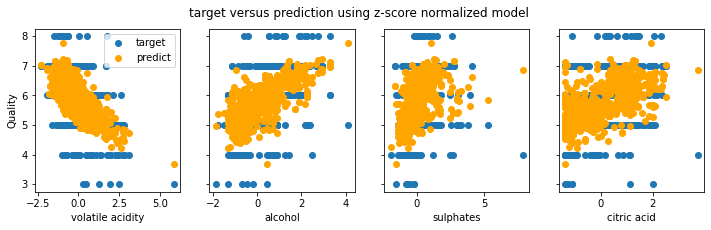

In [59]:
#predict target using normalized features
m = x.shape[0]
yp = np.zeros(m)
predictions = model.predict(x)
print(predictions.shape)
yp= predictions

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter([x[:,i]],y, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter([x[:,i]],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Quality"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()